In [1]:
import numpy as np
import sympy as sym
from quantiphy import Quantity



### Calculating parasitic capacitance and inductance
ref: [link](https://www.edn.com/optimizing-snubber-design-through-frequency-domain-analysis/)



In [64]:
def print_float(var_name: str, value: float, unit: str = ''):
    print(var_name, ": ", Quantity(value, unit))


def calculate_parasitics(f1, f2, v1, v2, vin, cadd):
    f = np.array([f1, f2])

    w = f * 2*np.pi
    tr1 = 1/f1  # period
    
    a = -np.log((v2 - Vin)/(v1 - Vin))/tr1

    l1 = (1/cadd) * ((1/((w[1]**2)+a**2))-(1/((w[0]**2)+a**2)))
    c1 = 1/(((w[0]**2)+(a**2))*l1)
    r1 = 2*a*l1
    
    return l1, c1, r1


def calculate_parasitics2(f1, f2, v1, v2, vin, cadd):
    m = f1/f2
    c1 = cadd/((m**2)-1)
    l1 = ((m**2)-1)/(((2*np.pi*f1)**2)*(cadd))
    r1 = 0

    return l1, c1, r1


def calculate_optimized_snubber(c1, l1, r1, gsnb):

    c_snb = c1 * ((4-(4*gsnb))/(2*gsnb-1))

    rsnb_opt = np.sqrt((l1*(2*c1 + c_snb)*(c1 + c_snb))/(2*(c_snb**2)*c1))
    
    return c_snb, rsnb_opt


def calculate_optimized_snubber2(c1, l1, r1, gsnb):

    c_snb = c1 * 3

    rsnb_opt = np.sqrt(l1/c1)

    return c_snb, rsnb_opt

def calculate_max_power_dissipation(csnb, vin_max, fsw):
    return csnb * fsw * (vin_max**2)


### Example

In [63]:
#EXAMPLE
vin = Quantity(12, "V")
print(Vin)
# without capacitor
f1 = Quantity(106e6, "Hz")
v1 = Quantity(23.85, "V")
v2 = Quantity(23.55, "V")

# with capacitor
cadd = Quantity(6e-9, "F")
f2 = Quantity(47.4e6, "Hz")

l1 , c1, r1 = calculate_parasitics(f1, f2, v1, v2, vin, cadd)
print("EXAMPLE: ")
print_float("L1", l1, "H")
print_float("C1", c1, "F")
print_float("R1", r1, "R")

l1 = 1.5e-9
c1 = 0.5e-9
r1 = 10e-3

csnb , rsnb = calculate_optimized_snubber(c1 , l1, r1, 0.7)
print_float("csnb", csnb, "F")
print_float("rsnb", rsnb, "R")



5 V
EXAMPLE: 
L1 :  1.5032 nH
C1 :  1.4997 nF
R1 :  5.1127 mR
csnb :  1.5 nF
rsnb :  1.8257 R


### HIGH SIDE

In [68]:
#high side
vin_max = Quantity(50, "V")
fsw = Quantity(12e3, "Hz")
Vin = Quantity(5, "V")

# without capacitor
f1 = Quantity(8.446e6, "Hz")
v1 = Quantity(9.808, "V")
v2 = Quantity(6.923, "V")

# with capacitor
cadd = Quantity(9.54e-9, "F")
f2 = Quantity(6.6e6, "Hz")

print("method EDN:")
l1, c1, r1 = calculate_parasitics(f1, f2, v1, v2, vin, cadd)
print("high_side: ")
print_float("L1", l1, "H")
print_float("C1", c1, "F")
print_float("R1", r1, "R")

csnb, rsnb = calculate_optimized_snubber(c1, l1, r1, 0.7)
print_float("csnb", csnb, "F")
print_float("rsnb", rsnb, "R")

p_loss = calculate_max_power_dissipation(csnb, vin_max, fsw)
print_float("P_loss", p_loss, "W")

print("method TI:")
l1, c1, r1 = calculate_parasitics2(f1, f2, v1, v2, vin, cadd)
print("high_side: ")
print_float("L1", l1, "H")
print_float("C1", c1, "F")
print_float("R1", r1, "R")

csnb, rsnb = calculate_optimized_snubber2(c1, l1, r1, 0.7)
print_float("csnb", csnb, "F")
print_float("rsnb", rsnb, "R")

p_loss = calculate_max_power_dissipation(csnb, vin_max, fsw)
print_float("P_loss", p_loss, "W")


method EDN:
high_side: 
L1 :  22.456 nH
C1 :  15.483 nF
R1 :  347.62 mR
csnb :  46.449 nF
rsnb :  1.2695 R
P_loss :  1.3935 W
method TI:
high_side: 
L1 :  23.733 nH
C1 :  14.962 nF
R1 :  0 R
csnb :  44.885 nF
rsnb :  1.2595 R
P_loss :  1.3466 W


### LOW SIDE

In [74]:
#LOW SIDE
Vin = Quantity(5, "V")

# without capacitor
f1 = Quantity(27.27e6, "Hz")
v1 = Quantity(6.346, "V")
v2 = Quantity(5.615, "V")

# with capacitor
cadd = Quantity(10.768e-9, "F")
f2 = Quantity(14.7e6, "Hz")

print("method EDN:")
l1, c1, r1 = calculate_parasitics(f1, f2, v1, v2, vin, cadd)
print("#LOW SIDE: ")
print_float("L1", l1, "H")
print_float("C1", c1, "F")
print_float("R1", r1, "R")

csnb, rsnb = calculate_optimized_snubber(c1, l1, r1, 0.7)
print_float("csnb", csnb, "F")
print_float("rsnb", rsnb, "R")

p_loss = calculate_max_power_dissipation(csnb, vin_max, fsw)
print_float("P_loss", p_loss, "W")

print("method TI:")
l1, c1, r1 = calculate_parasitics2(f1, f2, v1, v2, vin, cadd)
print("#LOW SIDE: ")
print_float("L1", l1, "H")
print_float("C1", c1, "F")
print_float("R1", r1, "R")

csnb, rsnb = calculate_optimized_snubber2(c1, l1, r1, 0.7)
print_float("csnb", csnb, "F")
print_float("rsnb", rsnb, "R")
p_loss = calculate_max_power_dissipation(csnb, vin_max, fsw)
print_float("P_loss", p_loss, "W")


method EDN:
#LOW SIDE: 
L1 :  7.2186 nH
C1 :  4.6465 nF
R1 :  308.37 mR
csnb :  13.939 nF
rsnb :  1.3138 R
P_loss :  418.18 mW
method TI:
#LOW SIDE: 
L1 :  7.7228 nH
C1 :  4.4106 nF
R1 :  0 R
csnb :  13.232 nF
rsnb :  1.3232 R
P_loss :  396.95 mW


### Choosing the proper Rsnb value


1.3041474654377883e-09
3.7435954506357714


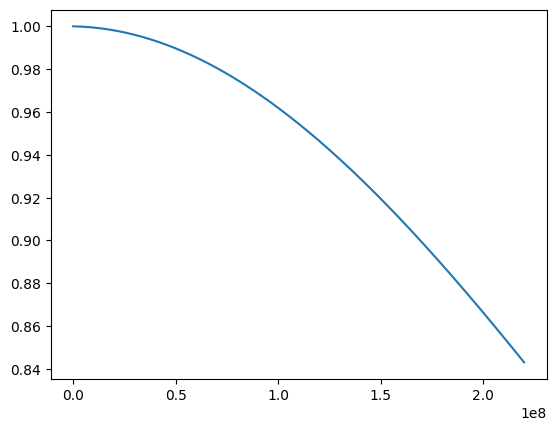